# DBSCAN on feature categories 

In [1]:
import pandas as pd
import os
import numpy as np
import subscript.config as cn

### Import data

In [2]:
df_dbscan = pd.read_csv(os.path.join(cn.clean_dir,'final_aggregated_categories.csv'))

/Users/haleyspeed/Docs/insight/ins_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df_dbscan.copy() 
df.head()

,Unnamed: 0,Unnamed: 0.1,player,realm,gear_score,last_login,time_since_login,engagement,status,Alterac Valley,...,Tol Barad,Twin Peaks,Visions of N'Zoth,War Effort,Warsong Gulch,Winter Veil,Wintergrasp,World,World Events,Wrath of the Lich King
0,0,zeezle_burning-blade,zeezle,burning-blade,404.0,2020-05-21,15 days 00:00:00.000000000,0.0,active,3,...,6,1,0,1,5,5,13,4,1,12
1,1,lokina_burning-blade,lokina,burning-blade,398.0,2020-05-21,15 days 00:00:00.000000000,0.0,active,3,...,0,0,0,3,4,3,5,5,0,11
2,2,roilyn_burning-blade,roilyn,burning-blade,411.0,2020-06-09,-4 days +00:00:00.000000000,0.0,active,3,...,1,0,0,5,2,3,0,5,0,11
3,3,virene_burning-blade,virene,burning-blade,381.0,2020-06-09,-4 days +00:00:00.000000000,0.0,active,3,...,0,0,0,3,2,3,4,5,0,11
4,4,sarelindra_burning-blade,sarelindra,burning-blade,354.0,2020-02-02,124 days 00:00:00.000000000,1.0,risk,2,...,1,0,0,3,2,2,9,5,0,3


In [4]:
player_cols =  ['Unnamed: 0','Unnamed: 0.1','player','realm','gear_score','last_login',
            'time_since_login', 'engagement','status']
df = df.drop(player_cols, axis = 1)
df.head()

,Alterac Valley,Arathi Basin,Archaeology,Arena,Argent Tournament,Ashran,Battle Dungeon,Battle Raid,Battle for Azeroth,Battle for Gilneas,...,Tol Barad,Twin Peaks,Visions of N'Zoth,War Effort,Warsong Gulch,Winter Veil,Wintergrasp,World,World Events,Wrath of the Lich King
0,3,3,79,6,15,2,0,0,19,2,...,6,1,0,1,5,5,13,4,1,12
1,3,2,0,4,0,2,10,3,22,0,...,0,0,0,3,4,3,5,5,0,11
2,3,2,0,2,5,2,26,0,23,0,...,1,0,0,5,2,3,0,5,0,11
3,3,3,0,2,0,2,1,0,23,0,...,0,0,0,3,2,3,4,5,0,11
4,2,3,10,4,0,4,13,0,21,0,...,1,0,0,3,2,2,9,5,0,3


### DBSCAN 

In [16]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Compute DBSCAN
db = DBSCAN(eps=5, min_samples=5).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

322
102847


### Plot DBSCAN results

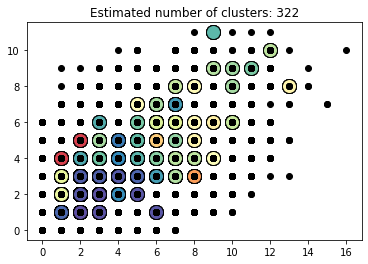

In [17]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [19]:
print (labels)

[-1 -1 -1 ... -1 -1 -1]
